In [37]:
import pandas as pd

picher_file_path = './data/picher_stats_2017.csv'
picher = pd.read_csv(picher_fil_path)
picher.columns
#picher.shape
#picher.head()

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [3]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

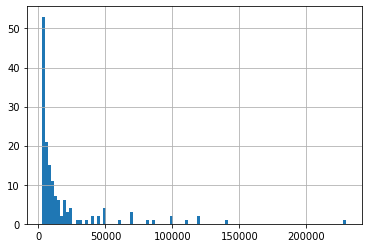

In [4]:
picher['연봉(2018)'].hist(bins =100)

<AxesSubplot:>

c:\users\smjsi\anaconda3\envs\xb00036\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\smjsi\anaconda3\envs\xb00036\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\smjsi\anaconda3\envs\xb00036\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\smjsi\anaconda3\envs\xb00036\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0, flags=flags)


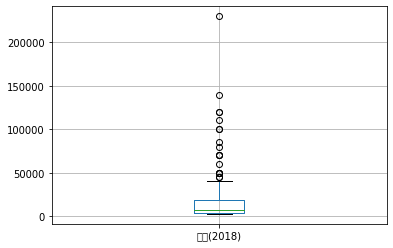

In [5]:
 picher.boxplot(column = ['연봉(2018)'])

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
picher_features_df =picher[['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]
picher_features_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


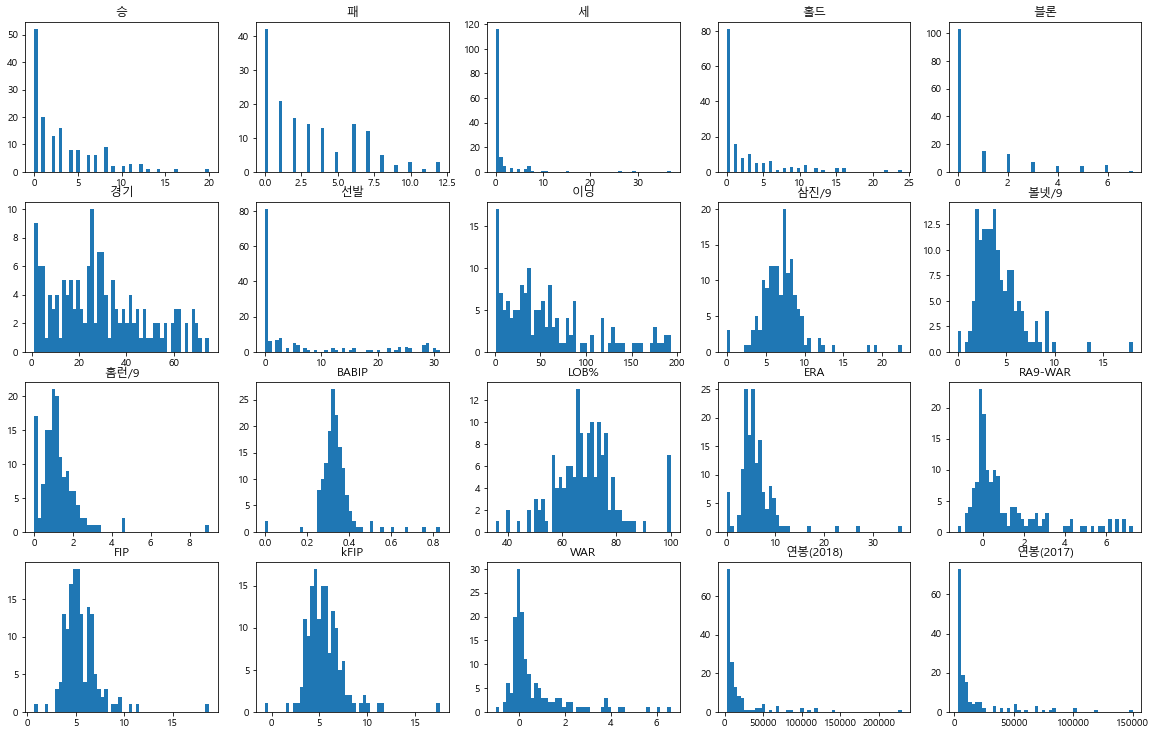

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

picher_features_df =picher[[ '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]
#picher_features_df.info()

def plot_hist_each_column(df):
    plt.rc('font',family='Malgun Gothic')
    plt.rcParams['figure.figsize']=[20,16]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(picher_features_df)

In [8]:
def standard_scaling(df,scale_columns):
    temp_df = df.copy()
    for col in scale_columns:
        series_mean = temp_df[col].mean()
        series_std = temp_df[col].std()
        temp_df[col] = temp_df[col].apply(lambda x: (x-series_mean) / series_std)
    return temp_df

scale_columns= [ '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [9]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [10]:
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [11]:
pd.options.mode.chained_assignment =None
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [12]:
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})

In [13]:
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [14]:
picher_df['팀명']

0       SK
1       LG
2      KIA
3       LG
4       롯데
      ... 
147     한화
148    KIA
149     롯데
150     삼성
151     KT
Name: 팀명, Length: 152, dtype: object

In [15]:
team_encoding = pd.get_dummies(picher_df['팀명'])

In [16]:
picher_df = picher_df.drop('팀명',axis=1)

In [17]:
picher_df = picher_df.join(team_encoding)

In [18]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [19]:
X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
X.shape

(152, 28)

In [20]:
y=picher_df['y'] # 1차원 시리즈
y.shape

(152,)

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=19) #8대 2의 비율

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(121, 28) (31, 28)
(121,) (31,)


In [22]:
X_train.head()

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
94,0.544959,0.708951,-0.548806,1,0,0,-2.460666,0,-0.665457,0,...,-0.105959,-0.624825,-0.306452,-0.827554,-0.463349,-1.052812,-1.008613,0,-0.585705,-1.189625
118,-0.016931,-0.611056,0.386499,0,1,0,1.404205,0,-0.410536,0,...,-0.548038,-0.624825,-0.306452,-0.827554,-0.499282,-0.774469,-1.008613,0,-0.364245,0.776804
109,-0.185498,0.399349,1.022507,0,0,0,-0.079629,0,-0.584099,0,...,-0.311084,-0.317136,-0.306452,-0.568731,-0.547193,-0.909664,-0.689219,0,-0.585705,0.324526
5,-0.578820,-0.721456,-0.580874,0,1,0,0.653661,0,2.963100,0,...,0.130995,2.041816,-0.306452,1.243035,0.738417,2.048726,2.185327,0,-0.585705,-0.088425
75,-0.084357,0.245749,-0.067792,1,0,0,-1.002712,0,-0.594947,0,...,-0.219131,-0.624825,-0.306452,-0.568731,-0.459357,-0.853995,-0.689219,0,0.300137,-0.560368


In [23]:
X_test.head()

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
2,-0.095595,-0.625456,-0.837415,1,0,0,0.308584,0,2.973948,0,...,0.109775,2.554632,-0.306452,4.348918,5.329881,2.706808,0.907751,0,-0.585705,-0.412886
42,-0.264162,-0.507855,-0.671732,0,0,1,0.636407,0,0.213207,0,...,0.406852,-0.624825,-0.098502,-0.051084,-0.219802,-0.094516,-0.050431,0,4.729351,-0.176914
100,-0.972143,-0.455055,-0.110549,0,0,0,0.420734,0,-0.399688,0,...,-0.583404,-0.624825,-0.306452,-0.827554,-0.551186,-0.710848,-1.008613,1,-0.364245,0.039393
124,0.544959,-0.083053,0.514770,0,0,0,-0.278049,0,-0.849868,0,...,-0.477305,-0.419699,-0.306452,-0.568731,-0.419431,-0.535889,-1.008613,0,-0.585705,0.580161
27,-0.320351,-0.476655,-0.586218,0,0,0,0.248195,1,0.495248,0,...,0.594293,-0.317136,0.317397,0.466564,-0.020173,0.621223,-0.689219,0,0.743059,-0.186746


In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
print(lr.coef_,lr.intercept_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745] 18640.472964544068


In [26]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()
model = lr.fit(X_train,y_train)

print(lr.coef_,lr.intercept_) 

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745] 18640.472964544068


In [27]:
print("R2=")
print(model.score(X_train,y_train))
print(lr.score(X_test,y_test))

R2=
0.9276949405576705
0.8860171644977818


In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('RMSE=')
print(sqrt(mean_squared_error(y_train,lr.predict(X_train))))
print(sqrt(mean_squared_error(y_test,lr.predict(X_test))))

RMSE=
7282.7186847463745
14310.696436889131


In [29]:
!pip install statsmodels

You should consider upgrading via the 'c:\users\smjsi\anaconda3\envs\xb00036\python.exe -m pip install --upgrade pip' command.


In [30]:
import statsmodels.api as sm


X_train -sm.add_constant(X_train)
model = sm.OLS (y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           7.70e-42
Time:                        15:19:02   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA         1.708e+04   2332.163      7.324      0.000    1.24e+04    2.17e+04
KT          2.021e+04   2208.542      9.152      0.000    1.58e+04    2.46e+04
LG          1.789e+04   2508.189      7.134      0.000    1.29e+04    2.29e+04
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1.812e+04   2822.991      6.418      0.000    1.25e+04    2.37e+04
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          1.954e+04   2337.570      8.359      0.000    1.49e+04    2.42e+04
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산          1.775e+04   2754.746      6.443      0.000    1.23e+04    2.32e+04
롯데          1.909e+04   2691.571      7.093      0.000    1.37e+04    2.44e+04
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          1.583e+04   2613.810      6.056      0.000    1.06e+04     2.1e+04
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          2.225e+04   2292.308      9.708      0.000    1.77e+04    2.68e+04
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'BABIP'),
 Text(1, 0, 'ERA'),
 Text(2, 0, 'FIP'),
 Text(3, 0, 'KIA'),
 Text(4, 0, 'KT'),
 Text(5, 0, 'LG'),
 Text(6, 0, 'LOB%'),
 Text(7, 0, 'NC'),
 Text(8, 0, 'RA9-WAR'),
 Text(9, 0, 'SK'),
 Text(10, 0, 'WAR'),
 Text(11, 0, 'kFIP'),
 Text(12, 0, '경기'),
 Text(13, 0, '두산'),
 Text(14, 0, '롯데'),
 Text(15, 0, '볼넷/9'),
 Text(16, 0, '블론'),
 Text(17, 0, '삼성'),
 Text(18, 0, '삼진/9'),
 Text(19, 0, '선발'),
 Text(20, 0, '세'),
 Text(21, 0, '승'),
 Text(22, 0, '연봉(2017)'),
 Text(23, 0, '이닝'),
 Text(24, 0, '패'),
 Text(25, 0, '한화'),
 Text(26, 0, '홀드'),
 Text(27, 0, '홈런/9')]

c:\users\smjsi\anaconda3\envs\xb00036\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\smjsi\anaconda3\envs\xb00036\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


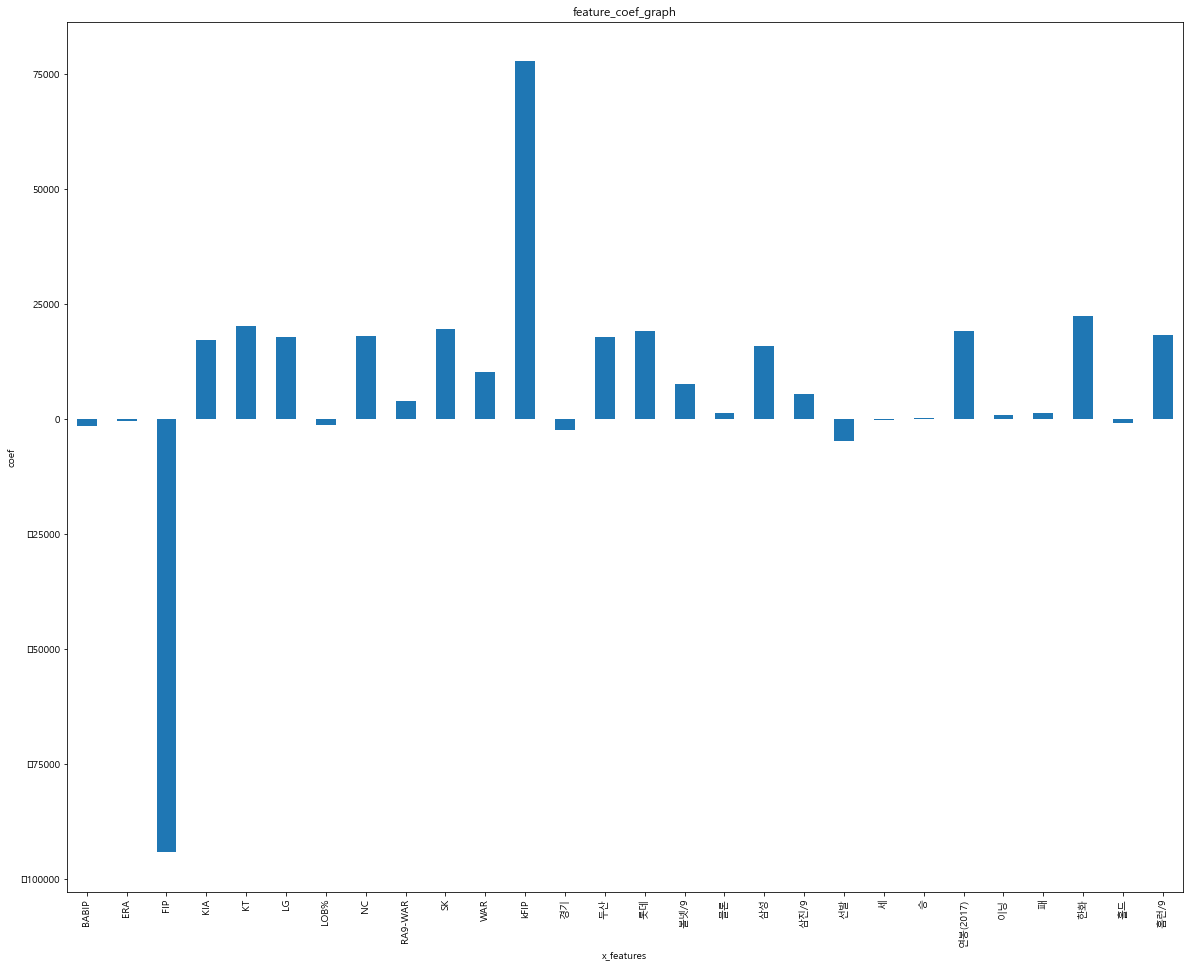

In [31]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [20, 16]

coefs = model.params.tolist()
coefs_series  = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

c:\users\smjsi\anaconda3\envs\xb00036\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\smjsi\anaconda3\envs\xb00036\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


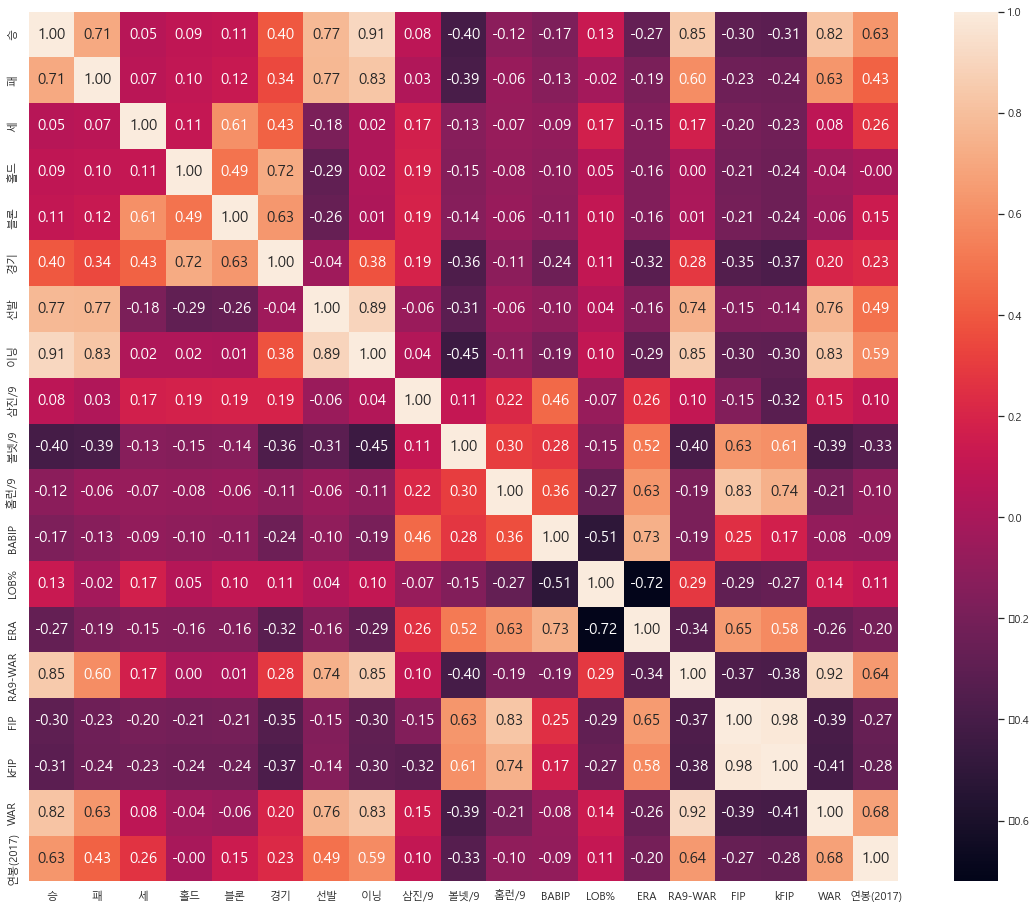

In [32]:
import seaborn as sns

corr = picher_df[scale_columns].corr(method='pearson')
show_cols = picher_df[scale_columns].columns.to_list()

sns.set(font = ' Malgun Gothic')
hm = sns.heatmap(corr.values, 
            cbar =True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size':15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.round(1)

,Features,VIF
0,BABIP,3.2
1,ERA,10.6
2,FIP,14238.3
3,KIA,1.1
4,KT,1.1
5,LG,1.1
6,LOB%,4.3
7,NC,1.1
8,RA9-WAR,13.6
9,SK,1.1


In [34]:
X = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
y = picher_df['y']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=19) #8대 2의 비율

lr =LinearRegression()
model = lr.fit(X_train,y_train)

print("r2=")
print(model.score(X_train,y_train))
print(lr.score(X_test,y_test))

print('acc=')
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

print('rmse=')
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train,y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test,y_predictions)))

vif =pd.DataFrame()
vif["Features"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

r2=
0.9150591192570362
0.9038759653889866
acc=
0.9150591192570362
0.9038759653889866
rmse=
7893.462873347693
13141.866063591076


,Features,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [43]:
picher = pd.read_csv(picher_file_path)
result_df = picher[['선수명','연봉(2017)','연봉(2018)']]
result_df['예측연봉(2018)'] =pd.Series(lr.predict(X)).astype('int64')
result_df = result_df.sort_values(by=['연봉(2018)'], ascending =False)
result_df.columns = ['선수명','작년연봉(2017)','실제연봉(2018)','예측연봉(2018)']
result_df =result_df[result_df['작년연봉(2017)'] !=result_df['실제연봉(2018)']]
result_df.shape
result_df.head(10)

,선수명,작년연봉(2017),실제연봉(2018),예측연봉(2018)
2,양현종,150000,230000,163930
0,켈리,85000,140000,120122
1,소사,50000,120000,88127
4,레일리,85000,111000,102253
5,피어밴드,35000,85000,58975
23,배영수,55000,50000,56873
40,안영명,20000,35000,22420
67,채병용,25000,30000,21178
16,류제국,35000,29000,45122
55,박정진,33000,25000,29060


<AxesSubplot:xlabel='선수명'>

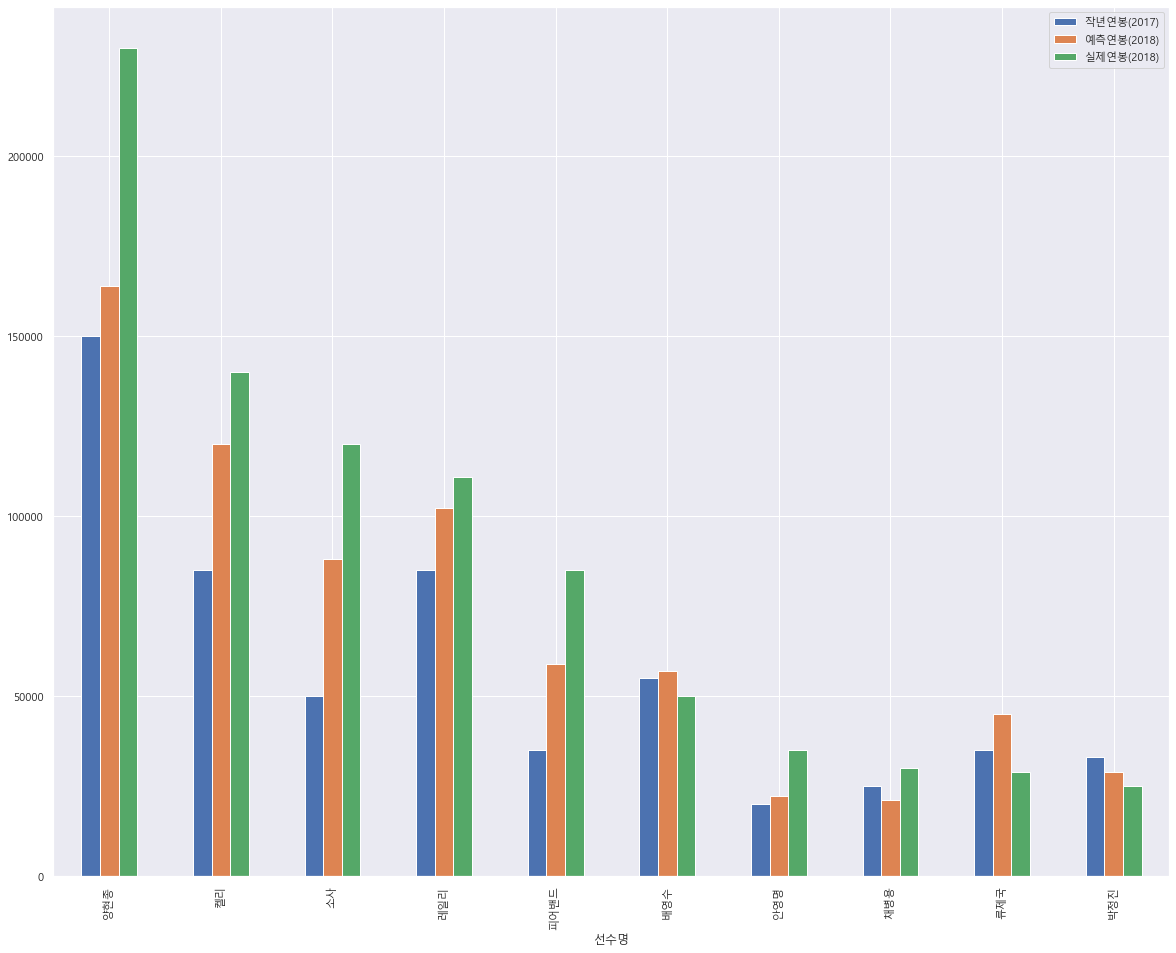

In [44]:
result_df = result_df.head(10)
plt.rc('font', family = 'Malgun Gothic')
result_df.plot(x='선수명',y=['작년연봉(2017)','예측연봉(2018)','실제연봉(2018)'],kind='bar')